# **Import Library & Study the Dataset**

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv", encoding='latin1')
df.shape

(8809, 26)

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

df.info()

In [4]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8808,s8809,Movie,Serena,Susanne Bier,"Bradley Cooper, Jennifer Lawrence, Toby Jones,...",United States,"April 5, 2024",2014,A,110 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Inspect Missing Values in Data Set**

In [7]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 24     8809
Unnamed: 23     8809
Unnamed: 22     8809
Unnamed: 21     8809
Unnamed: 20     8809
Unnamed: 19     8809
Unnamed: 18     8809
Unnamed: 17     8809
Unnamed: 16     8809
Unnamed: 15     8809
Unnamed: 25     8809
Unnamed: 12     8809
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
type               0
description        0
listed_in          0
release_year       0
title              0
show_id            0
dtype: int64

In [8]:
df.director = df.director.fillna("Unknown")
df.cast   = df.cast.fillna("No cast")
df.country = df.country.fillna("No country")
df.date_added = df.date_added.fillna("No date")
df.rating = df.rating.fillna("No rating")
df.duration = df.duration.fillna("0")

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [10]:
df = df.dropna(axis=1, how='all')

In [11]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [12]:
df["director"].value_counts().head(10)

director
Unknown                    2634
Rajiv Chilaka                19
RaÃºl Campos, Jan Suter      18
Suhas Kadav                  16
Marcus Raboy                 16
Jay Karas                    14
Cathy Garcia-Molina          13
Martin Scorsese              12
Youssef Chahine              12
Jay Chapman                  12
Name: count, dtype: int64

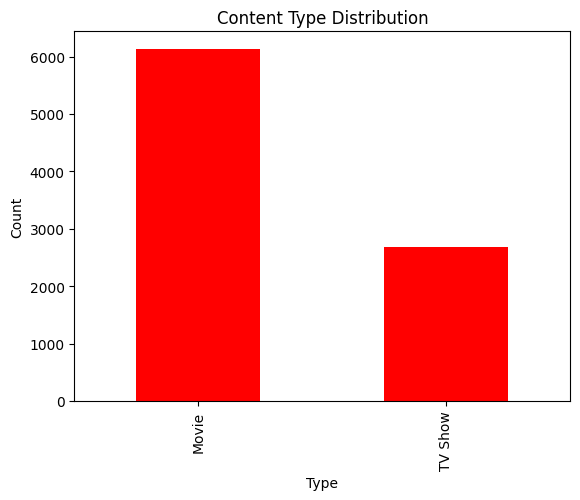

In [13]:
content_type_distribution = df['type'].value_counts()

content_type_distribution.plot(kind='bar', color='red')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [36]:
fig=go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index,
                       values=df.type.value_counts(normalize=True).values, hole=0.5)])



fig.update_layout(title='Movie vs TV Show')
fig.show()

# fig.update_layout(
#     showlegend=True,
#     annotations=[dict(
#         text='Movie vs TV Show', 
#         font=dict(size=16, color='green', family='Arial'),
#         showarrow=False,
#         x=0.5,
#         y=0.5
#     )]
# )

# fig.show()

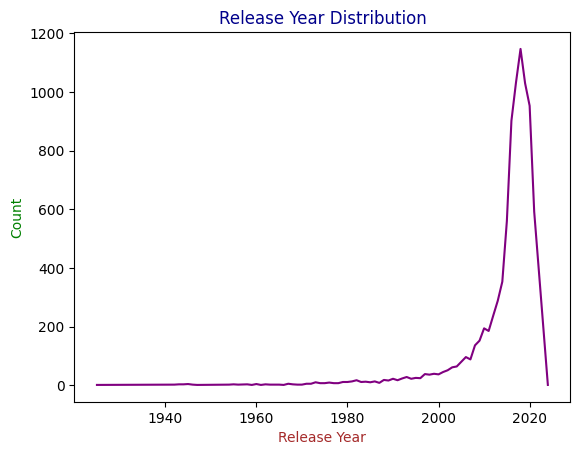

In [50]:
release_year_distribution = df['release_year'].value_counts().sort_index()

release_year_distribution.plot(kind='line', color='purple')
plt.title('Release Year Distribution',color='Darkblue')
plt.xlabel('Release Year',color='Brown')
plt.ylabel('Count',color='Green')
plt.show()

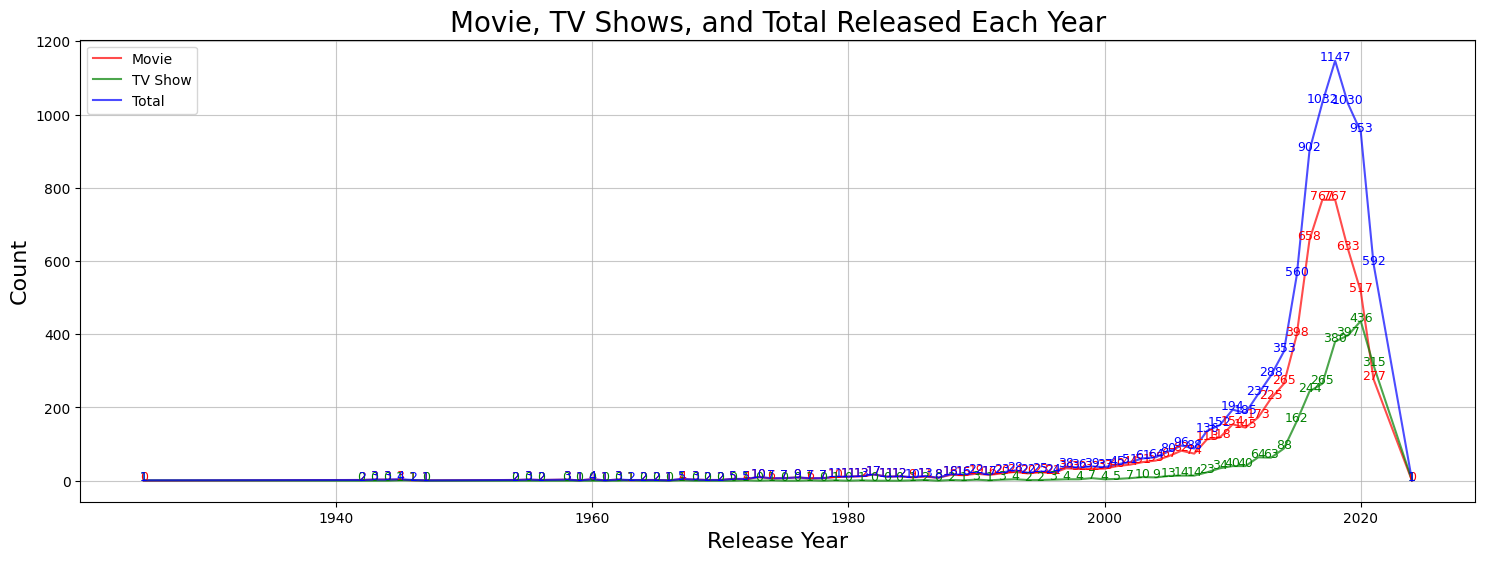

In [55]:
content_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_type['Total'] = content_type['Movie'] + content_type['TV Show']
content_type = content_type.reset_index()

plt.figure(figsize=(18, 6))
plt.title('Movie, TV Shows, and Total Released Each Year', fontsize=20)

plt.plot(content_type['release_year'], content_type['Movie'], label='Movie', color='r', alpha=0.7)
plt.plot(content_type['release_year'], content_type['TV Show'], label='TV Show', color='g', alpha=0.7)
plt.plot(content_type['release_year'], content_type['Total'], label='Total', color='b', alpha=0.7)

plt.grid(True, alpha=0.7)

for i in range(len(content_type['release_year'])):
    plt.text(content_type['release_year'][i], content_type['Movie'][i], content_type['Movie'][i], fontsize=9, ha='center', color='r')
    plt.text(content_type['release_year'][i], content_type['TV Show'][i], content_type['TV Show'][i], fontsize=9, ha='center', color='g')
    plt.text(content_type['release_year'][i], content_type['Total'][i], content_type['Total'][i], fontsize=9, ha='center', color='b')

plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper left')

plt.show()

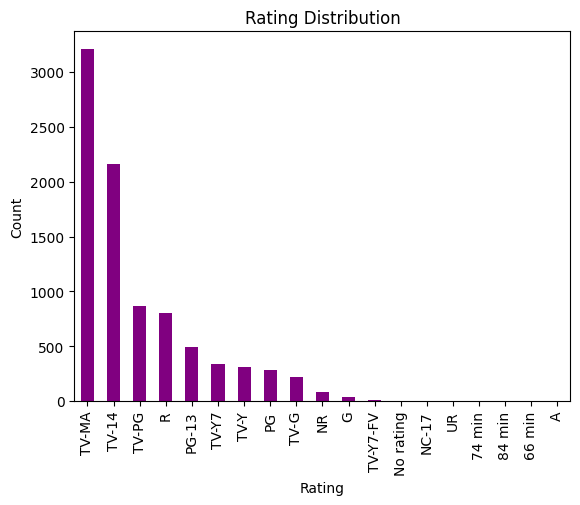

In [62]:
rating_distribution = df['rating'].value_counts()

rating_distribution.plot(kind='bar', color='purple')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

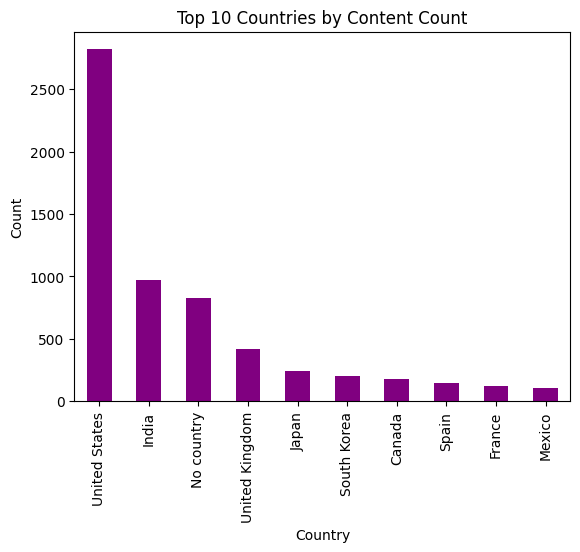

In [61]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

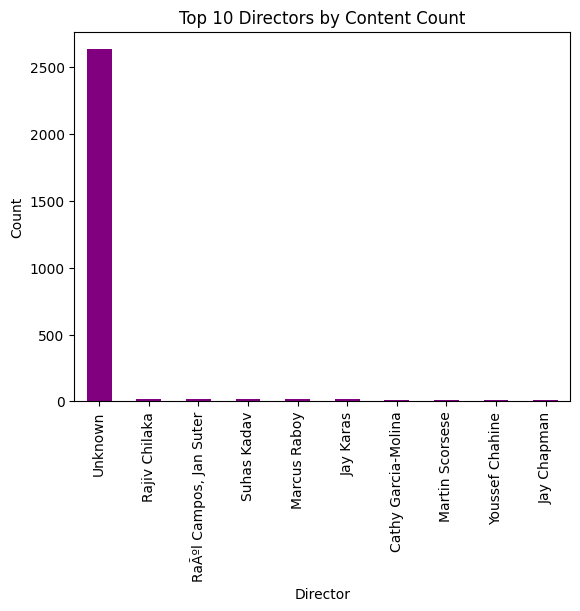

In [60]:
top_directors = df['director'].value_counts().head(10)

top_directors.plot(kind='bar', color='purple')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

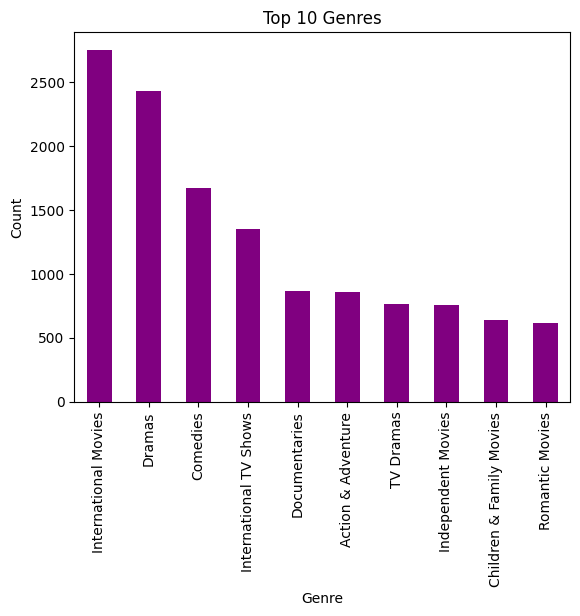

In [64]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)

top_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

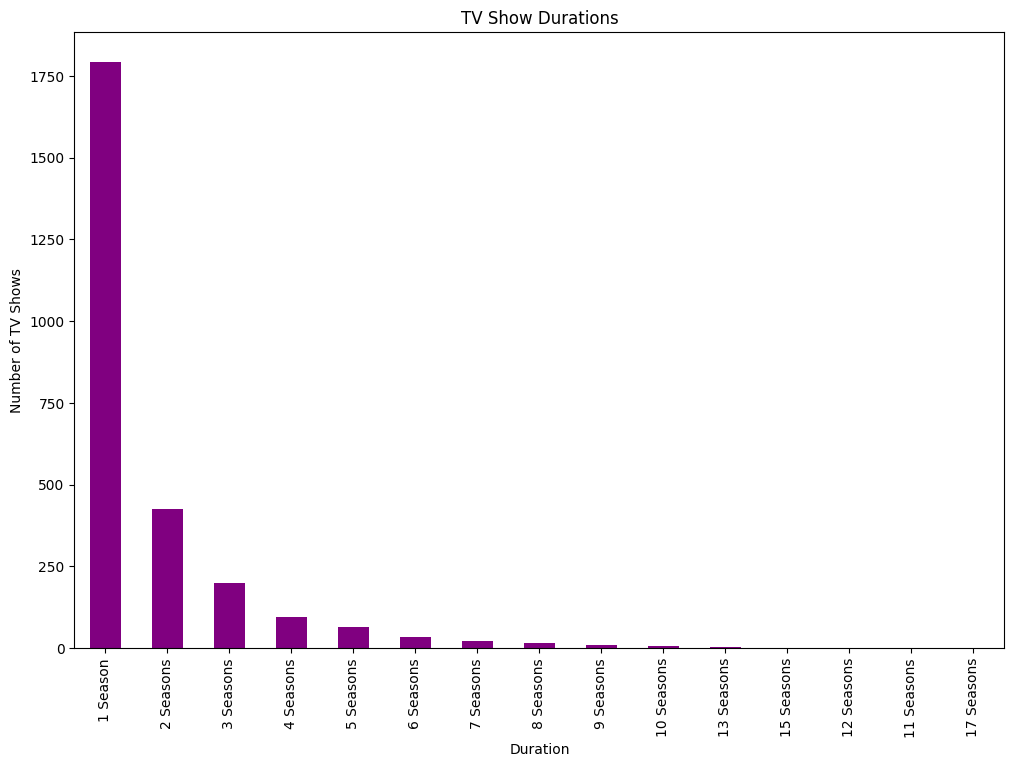

In [69]:
tv_shows = df[df['type'] == 'TV Show']

tv_shows_no_nan = tv_shows.dropna(subset=['duration'])

duration_counts = tv_shows_no_nan['duration'].value_counts()

plt.figure(figsize=(12, 8))
duration_counts.plot(kind='bar', color='purple')
plt.title('TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.show()

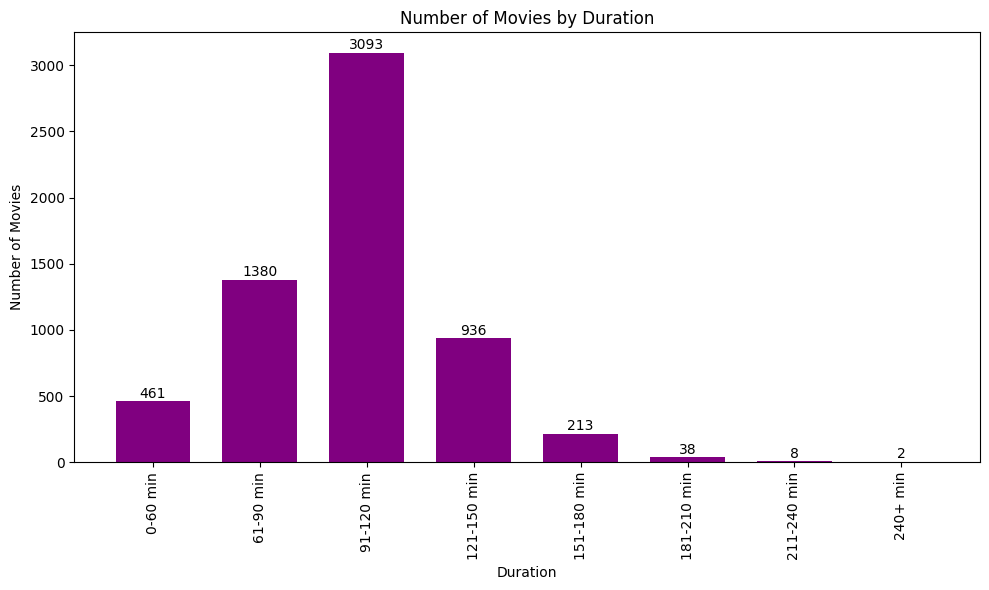

In [70]:
movies = df[df['type'] == 'Movie'].copy()

movies = movies.dropna(subset=['duration'])

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

bins = [0, 60, 90, 120, 150, 180, 210, 240, 300]
labels = ['0-60 min', '61-90 min', '91-120 min', '121-150 min', '151-180 min', '181-210 min', '211-240 min', '240+ min']
movies['duration_group'] = pd.cut(movies['duration_minutes'], bins=bins, labels=labels, right=False)

duration_group_counts = movies['duration_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(duration_group_counts.index, duration_group_counts.values, color='purple', width=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Duration')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [73]:
movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

average_duration = movies['duration_minutes'].mean()

print(f"The average duration of movies is approximately {average_duration:.2f} minutes.")

The average duration of movies is approximately 99.53 minutes.


In [78]:
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

tv_shows = df[df['type'] == 'TV Show'].dropna(subset=['duration']).copy()

tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

average_seasons = tv_shows['seasons'].mean()

print(f"The average number of seasons for TV shows is approximately {average_seasons:.2f} seasons.")

The average number of seasons for TV shows is approximately 1.76 seasons.


In [80]:
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

movies = movies[movies['duration_minutes'] > 0]

shortest_movies = movies.sort_values(by='duration_minutes').head(10)

for i, row in enumerate(shortest_movies.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Silent - 3.0 minutes (3 min)
2. Sol Levante - 5.0 minutes (5 min)
3. Cops and Robbers - 8.0 minutes (8 min)
4. Canvas - 9.0 minutes (9 min)
5. American Factory: A Conversation with the Obamas - 10.0 minutes (10 min)
6. Calico Critters: Everyone's Big Dream Flying in the Sky - 11.0 minutes (11 min)
7. Calico Critters: A Town of Dreams - 11.0 minutes (11 min)
8. Besieged Bread - 12.0 minutes (12 min)
9. Zion - 12.0 minutes (12 min)
10. Cosmos Laundromat: First Cycle - 12.0 minutes (12 min)


In [81]:
movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

longest_movies = movies[movies['duration_minutes'] > 0].sort_values(by='duration_minutes', ascending=False).head(10)

for i, row in enumerate(longest_movies.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Black Mirror: Bandersnatch - 312.0 minutes (312 min)
2. Headspace: Unwind Your Mind - 273.0 minutes (273 min)
3. The School of Mischief - 253.0 minutes (253 min)
4. No Longer kids - 237.0 minutes (237 min)
5. Lock Your Girls In - 233.0 minutes (233 min)
6. Raya and Sakina - 230.0 minutes (230 min)
7. Once Upon a Time in America - 229.0 minutes (229 min)
8. Sangam - 228.0 minutes (228 min)
9. Lagaan - 224.0 minutes (224 min)
10. Jodhaa Akbar - 214.0 minutes (214 min)


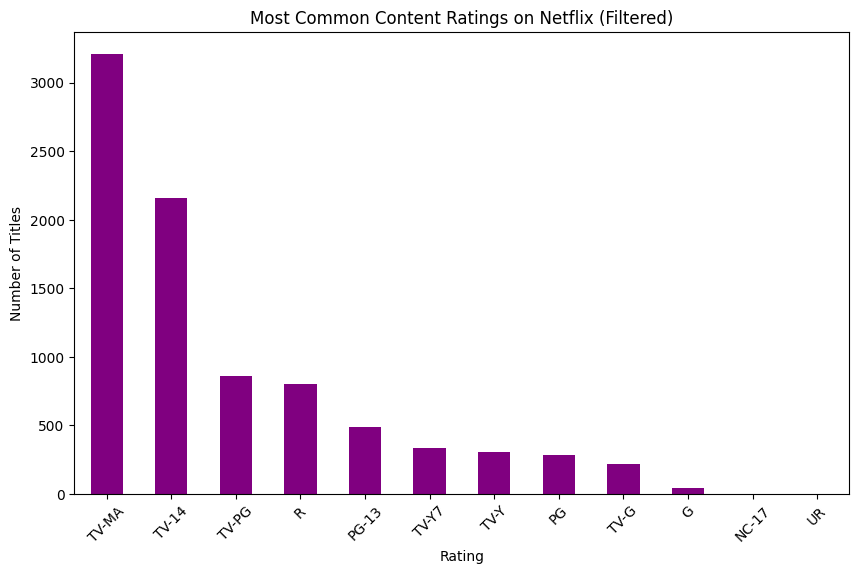

In [82]:
rating_counts = df['rating'].value_counts()

filtered_ratings = rating_counts[rating_counts.index.isin(['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'UR'])]

plt.figure(figsize=(10, 6))
filtered_ratings.plot(kind='bar', color='purple')
plt.title('Most Common Content Ratings on Netflix (Filtered)')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()